# Term Project:

<br>
<h2><center>DSC 630 Spring 2024</center></h2>
<h2><center>Garth Scheck </center></h2>

**Note:**
    This notebook was ran in Google Colab using TPU configuration with High-Ram.
    Usiung any other configuration may cause exceptions or unexpected results.

In [ ]:
%pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.2 MB/s eta 0:00:00


#### Import necessary packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Read data into dataframe.

In [2]:
# read in data from file
df = pd.read_csv('investigator_nacc64.csv')

<ipython-input-2-697c40fe30b6>:2: DtypeWarning: Columns (20,24,26,28,41,46,48,51,91,92,93,94,95,96,97,98,99,100,101,156,217,220,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,432,445,454,494,574,613,638,707,744,803,804,809,810,811,812,833,843,904,959,960,982,1004,1007) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('investigator_nacc64.csv')


In [3]:
for column in df:
    if df[column].isnull().any():
        print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

HISPORX has 2004 null values
RACEX has 2009 null values
RACESECX has 2028 null values
RACETERX has 2031 null values
PRIMLANX has 2016 null values
INHISPOX has 2022 null values
INRACEX has 2010 null values
INRASECX has 2033 null values
INRATERX has 2036 null values
INRELTOX has 2024 null values
NACCAMX has 1918 null values
NACCAMSX has 1919 null values
NACCFMX has 1919 null values
NACCFMSX has 1919 null values
NACCOMX has 1917 null values
NACCOMSX has 1924 null values
DRUG1 has 276 null values
DRUG2 has 395 null values
DRUG3 has 549 null values
DRUG4 has 740 null values
DRUG5 has 940 null values
DRUG6 has 1135 null values
DRUG7 has 1305 null values
DRUG8 has 1480 null values
DRUG9 has 1605 null values
DRUG10 has 1690 null values
DRUG11 has 1777 null values
DRUG12 has 1848 null values
DRUG13 has 1911 null values
DRUG14 has 1941 null values
DRUG15 has 1972 null values
DRUG16 has 1993 null values
DRUG17 has 2006 null values
DRUG18 has 2020 null values
DRUG19 has 2022 null values
DRUG20 has

#### Fill column null values with appropriate value.

In [4]:
# there is only one row missing this value so drop it
df.dropna(subset=['NPATGFR4'], inplace=True)

# handle all other missing values according to data dictionary
df['OTHCOND'].fillna(0, inplace=True)
df['HISPORX'].fillna(0, inplace=True)
df['RACEX'].fillna(0, inplace=True)
df['RACESECX'].fillna(0, inplace=True)
df['RACETERX'].fillna(0, inplace=True)
df['PRIMLANX'].fillna(0, inplace=True)
df['INHISPOX'].fillna(0, inplace=True)
df['INRACEX'].fillna(0, inplace=True)
df['INRASECX'].fillna(0, inplace=True)
df['INRATERX'].fillna(0, inplace=True)
df['INRELTOX'].fillna(0, inplace=True)
df['NACCAMX'].fillna(0, inplace=True)
df['NACCAMSX'].fillna(0, inplace=True)
df['NACCFMX'].fillna(0, inplace=True)
df['NACCFMSX'].fillna(0, inplace=True)
df['NACCOMX'].fillna(0, inplace=True)
df['NACCOMSX'].fillna(0, inplace=True)
df['CVOTHRX'].fillna(0, inplace=True)
df['RESPOTHX'].fillna("other", inplace=True)
df['NCOTHRX'].fillna("other", inplace=True)

df['DRUG1'].fillna("none", inplace=True)
df['DRUG2'].fillna("none", inplace=True)
df['DRUG3'].fillna("none", inplace=True)
df['DRUG4'].fillna("none", inplace=True)
df['DRUG5'].fillna("none", inplace=True)
df['DRUG6'].fillna("none", inplace=True)
df['DRUG7'].fillna("none", inplace=True)
df['DRUG8'].fillna("none", inplace=True)
df['DRUG9'].fillna("none", inplace=True)
df['DRUG10'].fillna("none", inplace=True)
df['DRUG11'].fillna("none", inplace=True)
df['DRUG12'].fillna("none", inplace=True)
df['DRUG13'].fillna("none", inplace=True)
df['DRUG14'].fillna("none", inplace=True)
df['DRUG15'].fillna("none", inplace=True)
df['DRUG16'].fillna("none", inplace=True)
df['DRUG17'].fillna("none", inplace=True)
df['DRUG18'].fillna("none", inplace=True)
df['DRUG19'].fillna("none", inplace=True)
df['DRUG20'].fillna("none", inplace=True)
df['DRUG21'].fillna("none", inplace=True)
df['DRUG22'].fillna("none", inplace=True)
df['DRUG23'].fillna("none", inplace=True)
df['DRUG24'].fillna("none", inplace=True)
df['DRUG25'].fillna("none", inplace=True)
df['DRUG26'].fillna("none", inplace=True)
df['DRUG27'].fillna("none", inplace=True)
df['DRUG28'].fillna("none", inplace=True)
df['DRUG29'].fillna("none", inplace=True)
df['DRUG30'].fillna("none", inplace=True)
df['DRUG31'].fillna("none", inplace=True)
df['DRUG32'].fillna("none", inplace=True)
df['DRUG33'].fillna("none", inplace=True)
df['DRUG34'].fillna("none", inplace=True)
df['DRUG35'].fillna("none", inplace=True)
df['DRUG36'].fillna("none", inplace=True)
df['DRUG37'].fillna("none", inplace=True)
df['DRUG38'].fillna("none", inplace=True)
df['DRUG39'].fillna("none", inplace=True)
df['DRUG40'].fillna("none", inplace=True)
df['ARTHTYPX'].fillna("none", inplace=True)
df['OTHSLEEX'].fillna("none", inplace=True)
df['ABUSX'].fillna("none", inplace=True)
df['PSYCDISX'].fillna("none", inplace=True)
df['CVDIMAGX'].fillna("none", inplace=True)
df['SPEECHX'].fillna("none", inplace=True)
df['FACEXPX'].fillna("none", inplace=True)
df['TRESTFAX'].fillna("none", inplace=True)
df['TRESTRHX'].fillna("none", inplace=True)
df['TRESTLHX'].fillna("none", inplace=True)
df['TRESTRFX'].fillna("none", inplace=True)
df['TRESTLFX'].fillna("none", inplace=True)
df['TRACTRHX'].fillna("none", inplace=True)
df['TRACTLHX'].fillna("none", inplace=True)
df['RIGDNEX'].fillna("none", inplace=True)
df['RIGDUPRX'].fillna("none", inplace=True)
df['RIGDUPLX'].fillna("none", inplace=True)
df['RIGDLORX'].fillna("none", inplace=True)
df['RIGDLOLX'].fillna("none", inplace=True)
df['TAPSRTX'].fillna("none", inplace=True)
df['TAPSLFX'].fillna("none", inplace=True)
df['HANDMVRX'].fillna("none", inplace=True)
df['HANDMVLX'].fillna("none", inplace=True)
df['HANDATRX'].fillna("none", inplace=True)
df['HANDATLX'].fillna("none", inplace=True)
df['LEGRTX'].fillna("none", inplace=True)
df['LEGLFX'].fillna("none", inplace=True)
df['ARISINGX'].fillna("none", inplace=True)
df['POSTUREX'].fillna("none", inplace=True)
df['GAITX'].fillna("none", inplace=True)
df['POSSTABX'].fillna("none", inplace=True)
df['BRADYKIX'].fillna("none", inplace=True)
df['NPIQINFX'].fillna("none", inplace=True)
df['OTHNEURX'].fillna("none", inplace=True)
df['COGOTHRX'].fillna("none", inplace=True)
df['NACCCGFX'].fillna("none", inplace=True)
df['COGMODEX'].fillna("none", inplace=True)
df['BEOTHRX'].fillna("none", inplace=True)
df['NACCBEFX'].fillna("none", inplace=True)
df['BEMODEX'].fillna("none", inplace=True)
df['MOMODEX'].fillna("none", inplace=True)
df['MMSELANX'].fillna("none", inplace=True)
df['NPSYLANX'].fillna("none", inplace=True)
df['MOCALANX'].fillna("none", inplace=True)

df['OTHBIOMX'].fillna("none", inplace=True)
df['OTHMUTX'].fillna("none", inplace=True)
df['FTLDSUBX'].fillna("none", inplace=True)
df['OTHCOGX'].fillna("none", inplace=True)
df['OTHPSYX'].fillna("none", inplace=True)
df['COGOTHX'].fillna("none", inplace=True)
df['COGOTH2X'].fillna("none", inplace=True)
df['COGOTH3X'].fillna("none", inplace=True)
df['CANCER'].fillna(-4, inplace=True)
df['CANCSITE'].fillna("none", inplace=True)

df['NACCWRI1'].fillna("none", inplace=True)
df['NACCWRI2'].fillna("none", inplace=True)
df['NACCWRI3'].fillna("none", inplace=True)
df['NPFAUT1'].fillna("none", inplace=True)
df['NPFAUT2'].fillna("none", inplace=True)
df['NPFAUT3'].fillna("none", inplace=True)
df['NPFAUT4'].fillna("none", inplace=True)
df['NPNIT'].fillna("none", inplace=True)
df['NPCERAD'].fillna("none", inplace=True)
df['NPADRDA'].fillna("none", inplace=True)
df['NPOCRIT'].fillna("none", inplace=True)
df['NPVOTH'].fillna("none", inplace=True)
df['NPLEWYCS'].fillna("none", inplace=True)
df['NPGENE'].fillna("none", inplace=True)
df['NPFHSPEC'].fillna("none", inplace=True)
df['NPTAUHAP'].fillna("none", inplace=True)
df['NPPRNP'].fillna("none", inplace=True)
df['NPCHROM'].fillna("none", inplace=True)
df['NPPNORM'].fillna("none", inplace=True)
df['NPCNORM'].fillna("none", inplace=True)
df['NPPADP'].fillna("none", inplace=True)
df['NPCADP'].fillna("none", inplace=True)
df['NPPAD'].fillna("none", inplace=True)
df['NPCAD'].fillna("none", inplace=True)
df['NPPLEWY'].fillna("none", inplace=True)
df['NPCLEWY'].fillna("none", inplace=True)
df['NPPVASC'].fillna("none", inplace=True)
df['NPCVASC'].fillna("none", inplace=True)
df['NPPFTLD'].fillna("none", inplace=True)
df['NPCFTLD'].fillna("none", inplace=True)
df['NPPHIPP'].fillna("none", inplace=True)
df['NPCHIPP'].fillna("none", inplace=True)
df['NPPPRION'].fillna("none", inplace=True)
df['NPCPRION'].fillna("none", inplace=True)
df['NPPOTH1'].fillna("none", inplace=True)
df['NPCOTH1'].fillna("none", inplace=True)
df['NPOTH1X'].fillna("none", inplace=True)
df['NPPOTH2'].fillna("none", inplace=True)
df['NPCOTH2'].fillna("none", inplace=True)
df['NPOTH2X'].fillna("none", inplace=True)
df['NPPOTH3'].fillna("none", inplace=True)
df['NPCOTH3'].fillna("none", inplace=True)
df['NPOTH3X'].fillna("none", inplace=True)

df['NPFIXX'].fillna("none", inplace=True)
df['NPTANX'].fillna("none", inplace=True)
df['NPABANX'].fillna("none", inplace=True)
df['NPASANX'].fillna("none", inplace=True)
df['NPTDPANX'].fillna("none", inplace=True)
df['NPPATHOX'].fillna("none", inplace=True)
df['NPPATHO'].fillna("none", inplace=True)

df['ARTYPEX'].fillna("none", inplace=True)
df['SLEEPOTX'].fillna("none", inplace=True)
df['ANTIENCX'].fillna("none", inplace=True)
df['OTHCONDX'].fillna("none", inplace=True)
df['NPHISOX'].fillna("none", inplace=True)

df['OTHNEUR'].fillna(0, inplace=True)
df['HEIGHT'].fillna(df['HEIGHT'].mean(), inplace=True)
df['WEIGHT'].fillna(df['WEIGHT'].mean(), inplace=True)
df['BPSYS'].fillna(df['WEIGHT'].mean(), inplace=True)
df['BPDIAS'].fillna(df['WEIGHT'].mean(), inplace=True)
df['HRATE'].fillna(df['WEIGHT'].mean(), inplace=True)

In [5]:
for column in df:
    if df[column].isnull().any():
        print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

#### Drop columns that provide additional diagnosis of dementia.

In [6]:
df.drop(columns=['NACCBVFT'], inplace=True)
df.drop(columns=['NACCIDEM'], inplace=True)
df.drop(columns=['NACCLBDS'], inplace=True)
df.drop(columns=['NACCALZD'], inplace=True)
df.drop(columns=['NACCALZP'], inplace=True)
df.drop(columns=['NACCPPAG'], inplace=True)
df.drop(columns=['PROBAD'], inplace=True)
df.drop(columns=['PROBADIF'], inplace=True)
df.drop(columns=['POSSAD'], inplace=True)
df.drop(columns=['POSSADIF'], inplace=True)

In [7]:
df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
1,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
2,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
3,NACC007213,186,I,3.0,5,24,2023,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
4,NACC008514,186,I,3.0,11,15,2022,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0


#### Plot total number of patients and patients with dementia over time.

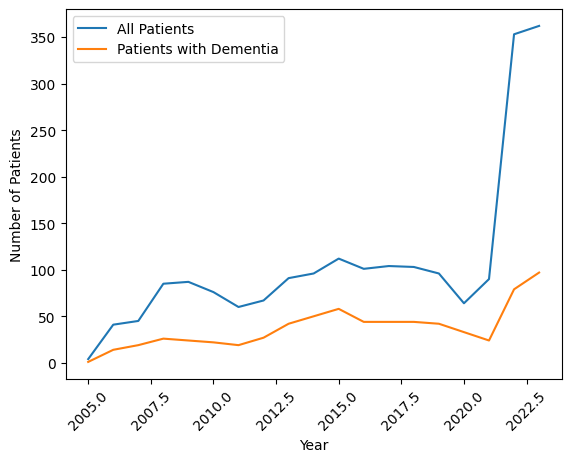

In [8]:
demented = df.loc[df['DEMENTED'] == 1]

demented = demented.rename(columns={"VISITYR": "year", "VISITMO": "month",
                                    "VISITDAY": "day"})
all_patients = df.rename(columns={"VISITYR": "year", "VISITMO": "month",
                                  "VISITDAY": "day"})

demented['VISIT_DATE'] = pd.to_datetime(demented[['year','month','day']])
all_patients['VISIT_DATE'] = pd.to_datetime(all_patients[['year','month',
                                                          'day']])

demented=demented.sort_values(by='VISIT_DATE')
all_patients=all_patients.sort_values(by='VISIT_DATE')

ct = all_patients.groupby(all_patients['VISIT_DATE'].dt.year)\
  ['DEMENTED'].count()
gp = demented.groupby(demented['VISIT_DATE'].dt.year)['DEMENTED'].sum()

# plot
ct.plot.line(label = "All Patients")
gp.plot.line(label = "Patients with Dementia")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

### Dementia cases by race.

Text(0.5, 1.0, 'Dementia by Race')

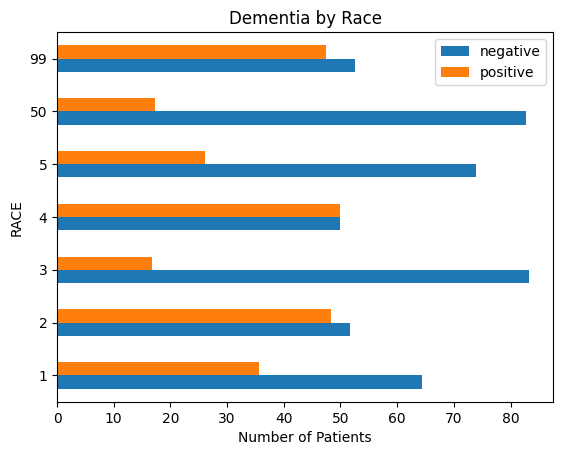

In [18]:
fig, ax = plt.subplots()
df.groupby('RACE')['DEMENTED'].value_counts(normalize=True).\
  mul(100).round(2).unstack().plot(kind='barh', ax=ax)
ax.legend(["negative", "positive"]);
ax.set_xlabel("Number of Patients")
ax.set_title("Dementia by Race")

### Dementia cases by gender.

Text(0.5, 1.0, 'Dementia by Gender')

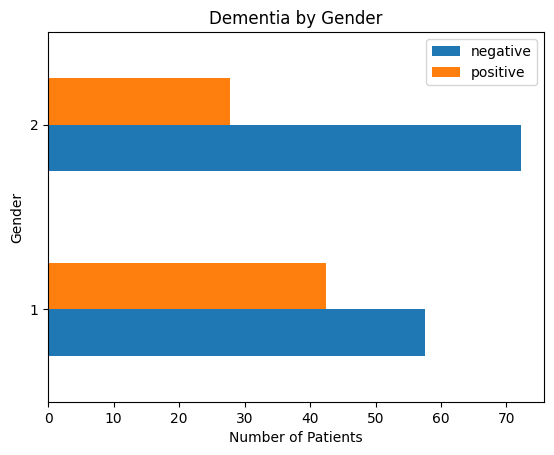

In [19]:
fig, ax = plt.subplots()
df.groupby('SEX')['DEMENTED'].value_counts(normalize=True).mul(100)\
  .round(2).unstack().plot(kind='barh', ax=ax)
ax.legend(["negative", "positive"]);
ax.set_xlabel("Number of Patients")
ax.set_ylabel("Gender")
ax.set_title("Dementia by Gender")

### Dementia cases by education level.

Text(0.5, 1.0, 'Dementia by Level of Education')

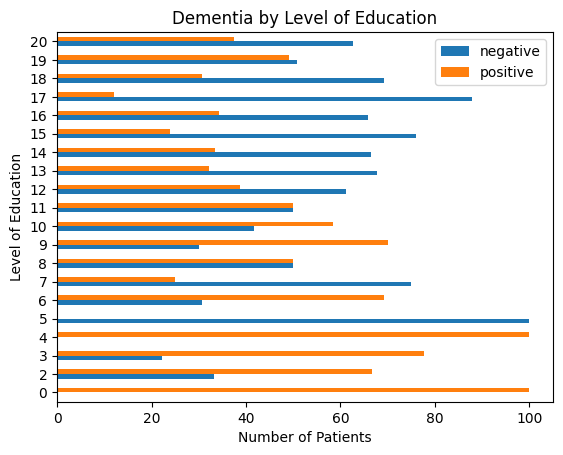

In [11]:
rslt_df = df.loc[df['EDUC'] < 21]
fig, ax = plt.subplots()
rslt_df.groupby('EDUC')['DEMENTED'].value_counts(normalize=True)\
  .mul(100).round(2).unstack().plot(kind='barh', ax=ax)
ax.legend(["negative", "positive"]);
ax.set_ylabel("Level of Education")
ax.set_xlabel("Number of Patients")
ax.set_title("Dementia by Level of Education")

### Prepare data for machine learning.

In [12]:
# convert categorical variables to numeric
df_dummies = pd.get_dummies(df)

#### Plot number of dementia cases by race over time.

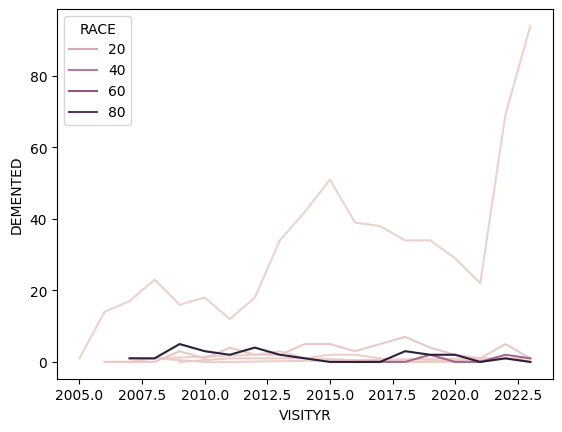

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_grouped = df.groupby(['RACE', 'VISITYR'])['DEMENTED'].sum().reset_index()
sns.lineplot(data=df_grouped, x='VISITYR', y='DEMENTED', hue='RACE')
plt.show()

In [14]:
# remove remaining rows with nulls from new dataframe
df_dummies.dropna(inplace=True)

#### Split numeric data into test and train data sets.

In [15]:
from sklearn.model_selection import train_test_split

# assign demented as target
X = df_dummies.drop(['DEMENTED'],axis=1).values
y = df_dummies['DEMENTED'].values

X_col = df_dummies.drop(['DEMENTED'],axis=1)
y_col = df_dummies['DEMENTED']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)



#### Create and test a Linear Discriminant Analysis model.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA(n_components=1)
clf.fit_transform(X_train, y_train)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA instance
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = lda.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.24%


#### Create a Random Forest Classifier model and use grid search to find optimal parameters.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# set up parameter search criteria
param_grid = {
    'n_estimators': [1, 5, 10, 20],
    #'max_features': [100, 200, 400, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,8],
    'criterion' :['gini', 'entropy']
}

# create model
classifier = RandomForestClassifier(random_state=42)

# use grid search to find optimal parameters
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 5, 10, 20]})

In [20]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 20}

#### Run model using optimal parameters.

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42,
                                    max_depth=8,
                                    max_features = 'auto',
                                    n_estimators = 20,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Display feature importance.

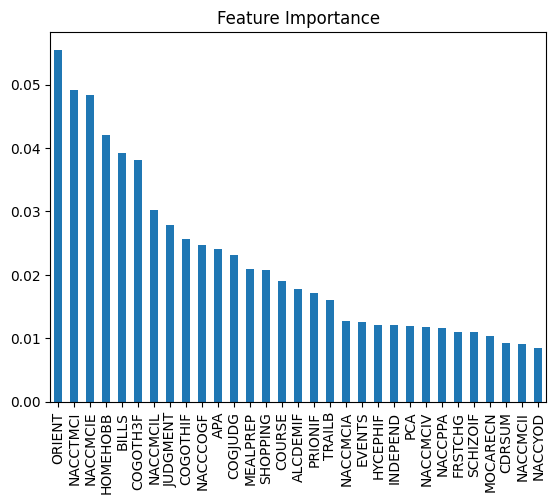

In [22]:
importances = pd.Series(classifier.feature_importances_,index=X_col.columns)
importances = importances[importances > 0.008]
importances.sort_values(ascending=False, inplace=True)

importances.plot.bar(title='Feature Importance')
plt.show()

#### Create a confusion matrix using Random Forest resuls.

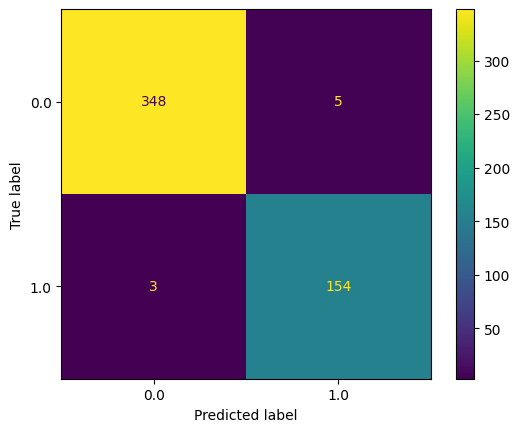

Accuracy = 98.43


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
        display_labels=classifier.classes_)
disp.plot()

plt.show()

print('Accuracy = ' + str('{0:.2f}'.format(accuracy_score(y_test, y_pred)\
                                           * 100)))

#### Create and test a Logistic Regression model.

In [24]:
# evaluate logistic regression model on raw data
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression()
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.857 (0.027)


Create and test a K-Neighbors Classifier model.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.43%
